<a href="https://colab.research.google.com/github/thanhyx4/dns-detect-anomaly/blob/main/EDA_DNS_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import gc

#from tqdm import tqdm

#0. Load

In [ ]:
result3use_columns = [
 'time',  'ttl',  'proc_time',
 'domainname',
  'ipv', 'prot',
 'src','srcp','dst', 'dstp',
 'aa', 'tc', 'rd', 'ra', 'z', 'ad', 'cd',
 'ancount', 'arcount', 'nscount', 'qdcount',
 'opcode', 'rcode',
 'qtype', 'qclass',  'qname',
 'country', 'asn', 'asn_organisation',
 'edns_udp', 'edns_version', 'edns_do',  'edns_other',
 'edns_client_subnet', 'edns_client_subnet_asn', 'edns_client_subnet_asn_organisation', 'edns_client_subnet_country',
 'labels',
  'q_tc', 'q_ra', 'q_ad',
 'pub_resolver',
 'req_len', 'res_len',
 'tcp_hs_rtt',
 'req_ip_df',
 'year', 'month', 'day',
 'server',
]

dtype1={'id': 'Int64',
 'time': 'Int64',
 'domainname': 'str',
 'ttl': 'float16',
 'ipv':'category', 'prot':'category',
 #'src','srcp','dst', 'dstp', asn
 'aa' :'category', 'tc':'category', 'rd':'category', 'ra':'category', 'z':'category', 'ad':'category', 'cd':'category',
  'q_tc':'category', 'q_ra':'category', 'q_ad':'category',
 'ancount': 'Int8', 'arcount': 'Int8', 'nscount': 'Int8', 'qdcount': 'Int8',
 'opcode': 'Int8', 'rcode': 'Int8',
 'qtype': 'float16', 'qclass' : 'float16',
'country':'str', 'asn':'float16', 'asn_organisation':'str',
'edns_udp':'float16', 'edns_version':'category', 'edns_do':'category',  'edns_other':'float16',
'edns_client_subnet': 'str', 'edns_client_subnet_asn':'str', 'edns_client_subnet_asn_organisation':'str', 'edns_client_subnet_country':'str',
 'labels': 'Int8',
 'proc_time': 'float32',
 'q_tc':'str', 'q_ra':'str', 'q_ad':'str',
 'pub_resolver': 'str',
 'req_len': 'float16', 'res_len': 'float16',
 'tcp_hs_rtt': 'float',
 'req_ip_df': 'str',
 'year': 'Int16', 'month': 'Int8', 'day':'Int8',
 'server': 'str',
 'qname': 'str',
  }

In [ ]:
dns_traffic = pd.read_csv("/content/drive/MyDrive/result24.csv", sep ='\t', on_bad_lines = "warn", dtype = dtype1, )     #300mb = 2 hours

In [ ]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [ ]:
dns_traffic.loc[dns_traffic['rcode'] == -1, 'qname'].value_counts().head()

203.66.119.203.in-addr.arpa.    5712
222.66.119.203.in-addr.arpa.    5038
205.66.119.203.in-addr.arpa.    5011
99.66.119.203.in-addr.arpa.     4993
219.66.119.203.in-addr.arpa.    4237
Name: qname, dtype: int64

In [ ]:
dns_traffic.loc[dns_traffic['z'].isna() & ((dns_traffic['src'] == '203.119.73.80') | (dns_traffic['src'] == '203.119.64.80') | (dns_traffic['src'] == '117.122.125.80') ), 'dst' ].value_counts()

203.119.8.106    35312
203.119.74.83     1768
Name: dst, dtype: int64

In [ ]:
dns_traffic.loc[dns_traffic['ttl'].isna(), 'country'].value_counts()

In [ ]:
print(dns_traffic.loc[(dns_traffic['src'] == '203.119.73.80')  , 'dst'].value_counts())
dns_traffic.loc[(dns_traffic['src'] == '203.119.73.80') & (dns_traffic['ttl'].isna())]#.value_counts().tail()


In [ ]:
dns_traffic.loc[dns_traffic['z'].isna() & (dns_traffic['asn_organisation'] == 'Vietnam Internet network information center VNNIC'), 'dst' ].value_counts()

203.119.8.106               108372
2001:dc8:1:2:0:0:0:80        81014
203.119.73.80                73969
203.119.36.106               67102
2001:dc8:9000:2:0:0:0:80     36945
2001:dc8:c001:2:0:0:0:80     32270
203.119.64.80                29082
117.122.125.80               27821
203.119.74.83                 8630
117.122.126.83                  27
Name: dst, dtype: int64

In [ ]:
dns_traffic['server'].unique()

array(['203.119.73.80', '203.119.64.80', '117.122.125.80'], dtype=object)

In [ ]:
dns_traffic['ipv'].value_counts()

4    3056898
6    1591720
Name: ipv, dtype: int64

In [ ]:
print(len(dns_traffic[dns_traffic['qname'].isna() ]) )
print(len(dns_traffic[dns_traffic['z'].isna() ]) )
print(len(dns_traffic[dns_traffic['rcode'] == -1]) )


1670
387619
154011


In [ ]:
a = dns_traffic[dns_traffic['ttl'].isna()].merge(dns_traffic[dns_traffic['rcode'] == -1], how='inner', left_on = ['id', 'qname'], right_on =['id', 'qname'])

In [ ]:
a

In [ ]:
a[(a['time_x'] - a['time_y']) < 30000]

#1. Pre-processing

In [ ]:
 def add_datetime(dns_traffic):
  dns_traffic['datetime'] = pd.to_datetime(dns_traffic['time'], unit ='ms')
  dns_traffic['datetime'] = dns_traffic['datetime'].dt.floor('s')
  dns_traffic['epoch_time'] =dns_traffic['time']/ 1000
  dns_traffic['time'] = dns_traffic['datetime'].dt.time
  return dns_traffic

## Check accuracy data

In [ ]:
dns_traffic = pd.read_csv("/content/drive/MyDrive/result19_20.csv", sep =',', on_bad_lines = "warn")     #300mb = 2 hours

In [ ]:
dns_traffic_burst = pd.read_csv("/content/drive/MyDrive/result3.tsv", sep ='\t', on_bad_lines = "warn", usecols = ['time', 'rcode'])     #300mb = 2 hours

In [ ]:
dns_traffic = add_datetime(dns_traffic)
dns_traffic_burst = add_datetime(dns_traffic_burst)
#chuan bi du lieu theo phut
dns_traffic['datetime_minute'] = dns_traffic['datetime'].dt.floor('min')


<Axes: ylabel='Queries per second'>

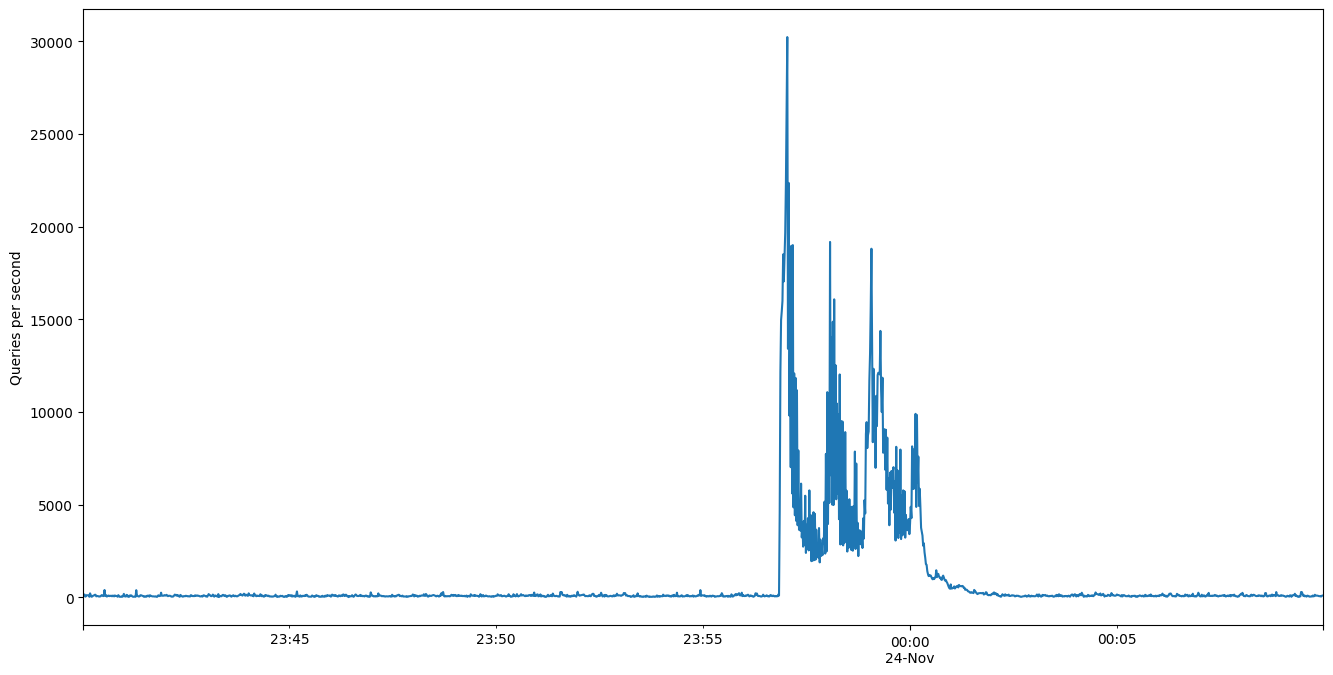

In [ ]:
dns_traffic_burst = dns_traffic_burst[(dns_traffic_burst['datetime'] > pd.to_datetime('2023-11-23 23:40:00')) & (dns_traffic_burst['datetime'] < pd.to_datetime('2023-11-24 00:10:00'))]

dns_traffic_burst['datetime'].value_counts().sort_index().plot(kind = 'line', figsize=(16,8), ylabel = 'Queries per second')

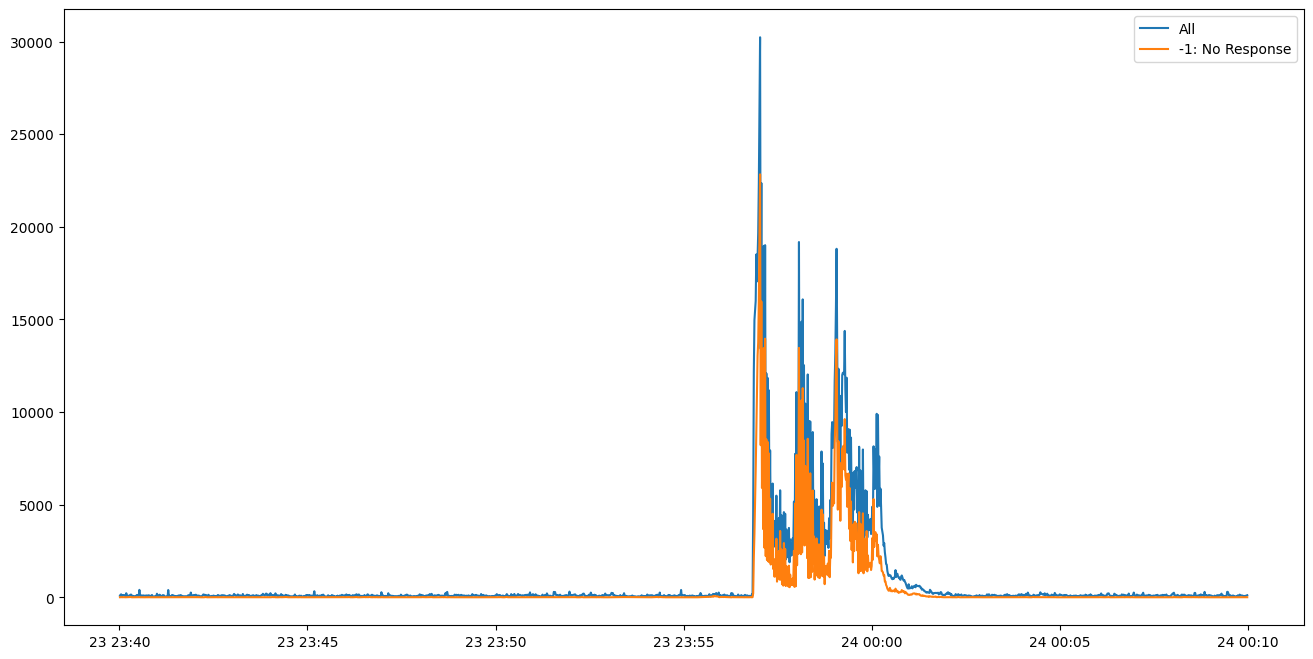

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(dns_traffic_burst['datetime'].value_counts().sort_index(), label ='All')
plt.plot(dns_traffic_burst.loc[(dns_traffic_burst['rcode'] == -1)   ,'datetime'].value_counts().sort_index(), label ='-1: No Response')

plt.legend()
plt.show()

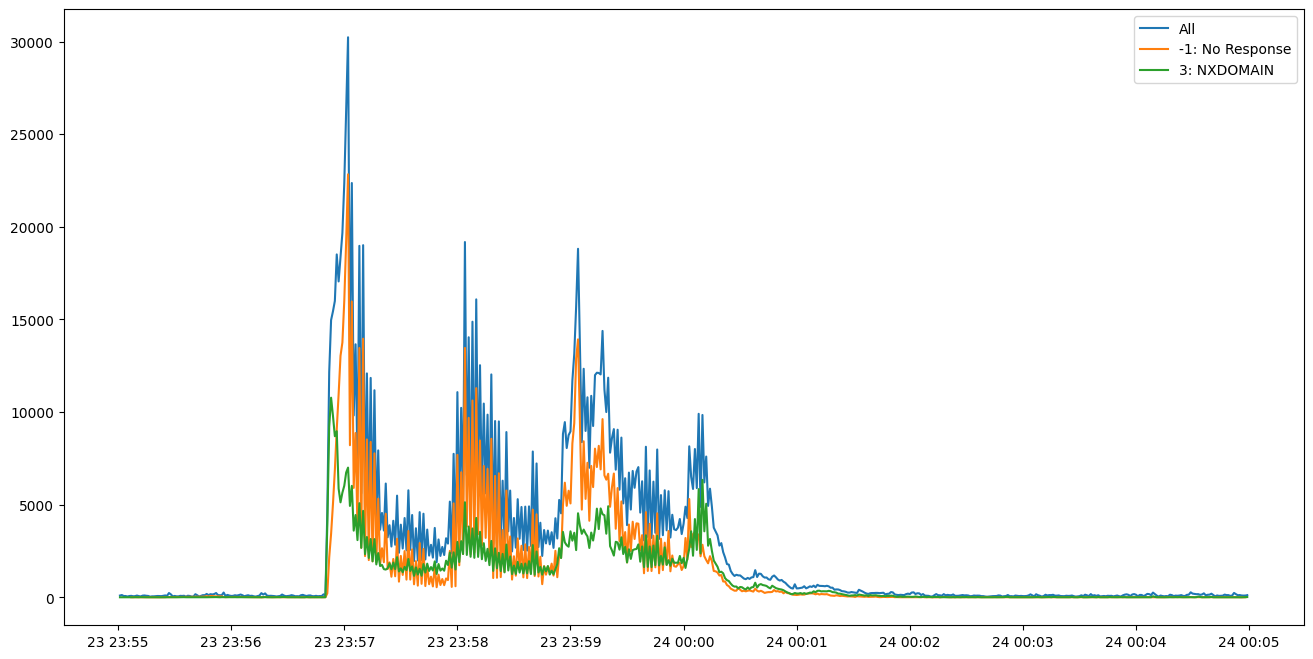

In [ ]:
#view each rcode/src over time
plt.figure(figsize = (16,8))
plt.plot(dns_traffic_burst['datetime'].value_counts().sort_index(), label = "All")

plt.plot(dns_traffic_burst.loc[(dns_traffic_burst['rcode'] == -1)   ,'datetime'].value_counts().sort_index(), label ='-1: No Response')
plt.plot(dns_traffic_burst.loc[(dns_traffic_burst['rcode'] == 3)  ,'datetime'].value_counts().sort_index(), label ='3: NXDOMAIN')

plt.legend()
plt.show()

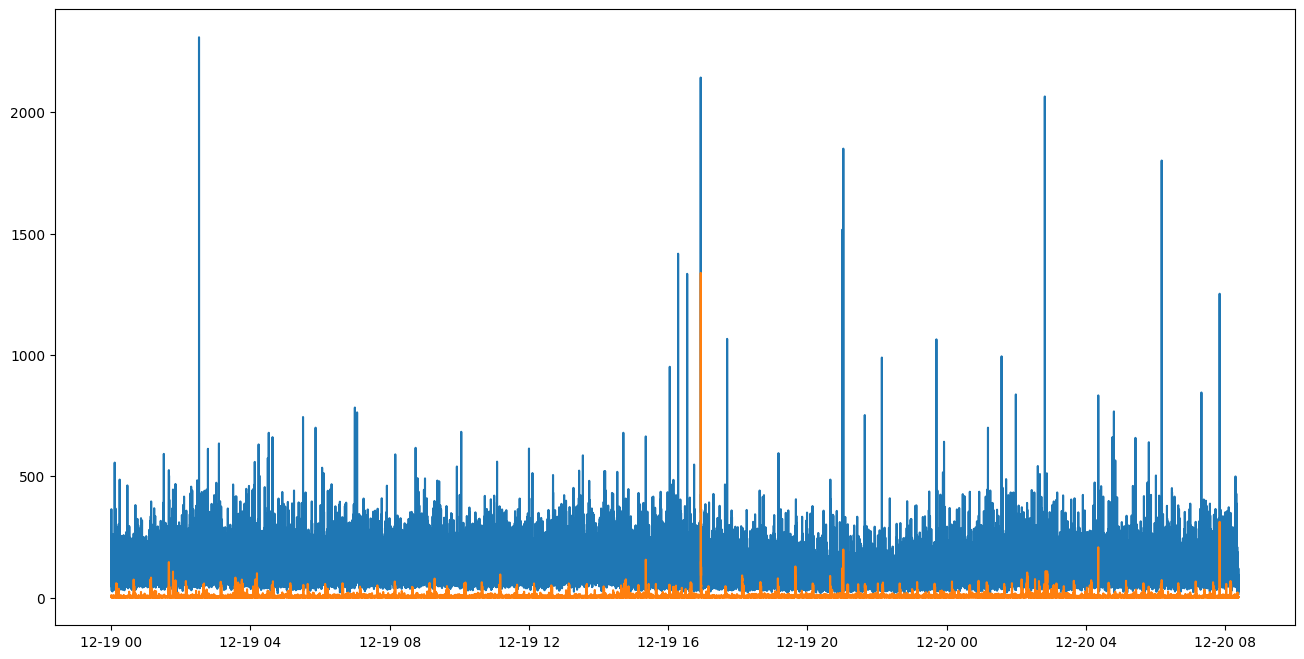

In [ ]:
#dns_traffic = dns_traffic[(dns_traffic['datetime_minute'] > pd.to_datetime('2023-11-23 23:40:00')) & (dns_traffic['datetime'] < pd.to_datetime('2023-11-24 00:10:00'))]

plt.figure(figsize = (16,8))
plt.plot(dns_traffic['datetime'].value_counts().sort_index())
plt.plot(dns_traffic.loc[(dns_traffic['rcode'] == -1)   ,'datetime'].value_counts().sort_index(), label ='-1: No Response')

plt.show()

In [ ]:
dns_traffic = dns_traffic[(dns_traffic['datetime'] > pd.to_datetime('2023-12-19 16:00:00')) & (dns_traffic['datetime'] < pd.to_datetime('2023-12-19 20:00:00'))]

plt.figure(figsize = (16,8))  #show / minutes
plt.plot(dns_traffic['datetime_minute'].value_counts().sort_index())
plt.plot(dns_traffic.loc[(dns_traffic['rcode'] == -1)   ,'datetime_minute'].value_counts().sort_index(), label ='-1: No Response')

plt.show()

357177     2023-12-19 16:59:45
367771     2023-12-19 17:00:21
376876     2023-12-19 17:01:35
378972     2023-12-19 17:02:31
379775     2023-12-19 16:59:20
                   ...        
11833813   2023-12-19 16:56:07
11833814   2023-12-19 16:56:07
11833815   2023-12-19 16:56:05
11833816   2023-12-19 16:56:01
11833817   2023-12-19 16:56:11
Name: datetime, Length: 18373, dtype: datetime64[ns]


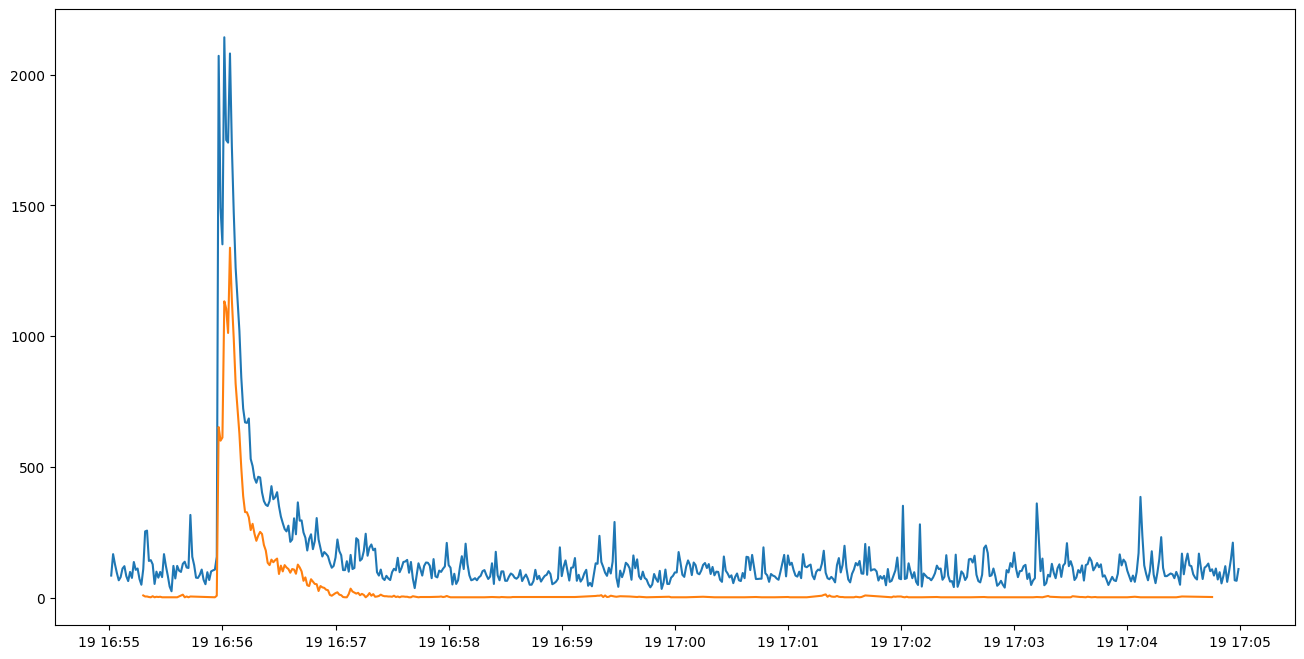

In [ ]:
dns_traffic = dns_traffic[(dns_traffic['datetime'] > pd.to_datetime('2023-12-19 16:55:00')) & (dns_traffic['datetime'] < pd.to_datetime('2023-12-19 17:05:00'))]
print(dns_traffic.loc[(dns_traffic['rcode'] == -1)   ,'datetime']) #.value_counts().sort_index()))
plt.figure(figsize = (16,8))
plt.plot(dns_traffic['datetime'].value_counts().sort_index())
plt.plot(dns_traffic.loc[(dns_traffic['rcode'] == -1)   ,'datetime'].value_counts().sort_index(), label ='-1: No Response')

plt.show()

In [ ]:
del dns_traffic, dns_traffic_burst

4023

## Convert IPv4 -> 6

## Categorical data

In [ ]:
#Option lien quan den DNS

## Unescessary features

In [ ]:
dns_traffic.columns

Index(['id', 'time', 'domainname', 'ttl', 'ipv', 'prot', 'src', 'srcp', 'dst',
       'dstp', 'aa', 'tc', 'rd', 'ra', 'z', 'ad', 'cd', 'ancount', 'arcount',
       'nscount', 'qdcount', 'opcode', 'rcode', 'qtype', 'qclass', 'country',
       'asn', 'asn_organisation', 'edns_udp', 'edns_version', 'edns_do',
       'edns_client_subnet', 'edns_other', 'edns_client_subnet_asn',
       'edns_client_subnet_asn_organisation', 'edns_client_subnet_country',
       'labels', 'proc_time', 'server_location', 'q_tc', 'q_ra', 'q_ad',
       'pub_resolver', 'req_len', 'res_len', 'tcp_hs_rtt', 'req_ip_df', 'year',
       'month', 'day', 'server', 'qname', 'datetime', 'epoch_time'],
      dtype='object')

### aa

In [ ]:
dns_traffic['aa'].value_counts(dropna=False)/len(dns_traffic)

true     0.793122
NaN      0.106599
false    0.100280
Name: aa, dtype: float64

In [ ]:
print(dns_traffic.loc[dns_traffic['aa'] == 'true', 'qname'].value_counts().head())
print('----------------')
print(dns_traffic.loc[dns_traffic['aa'] == 'false', 'qname'].value_counts().tail())

#

ns-hold.vnnic.vn.    3495028
dns1.vnnic.vn.        512900
dns3.vnnic.vn.        495431
dns2.vnnic.vn.        481696
vnnic.vn.             453936
Name: qname, dtype: int64
----------------
intellicorp.i-speed.vn.               1
hnl.i-speed.vn.                       1
23-227-37-137.i-speed.vn.             1
hungerandthirstforlife.i-speed.vn.    1
mass.gov.                             1
Name: qname, dtype: int64


In [ ]:
dns_traffic['server'] == '117.122.125.80'

array(['117.122.125.80', '203.119.64.80', '203.119.73.80'], dtype=object)

In [ ]:
pd.concat([dns_traffic[dns_traffic['server'] == '203.119.73.80'].loc[dns_traffic['aa'] == 'false', 'domainname'].value_counts().rename("false"),
           dns_traffic[dns_traffic['server'] == '203.119.73.80'].loc[dns_traffic['aa'] == 'true', 'domainname'].value_counts().rename("true")], axis = 1).dropna()

,false,true
203.in-addr.arpa,245124.0,149444.0
vnnic.vn,208392.0,2195107.0
vnnic.net.vn,393.0,110200.0
i-speed.vn,260.0,373184.0
2.ip6.arpa,257.0,28725.0
117.in-addr.arpa,13.0,27319.0
202.in-addr.arpa,7.0,11038.0
tenmien.vn,5.0,28176.0
dla.mil,4.0,9.0
vnix.vn,2.0,12634.0


In [ ]:
dns_traffic.loc[(dns_traffic['aa'] == 'false') & (dns_traffic['qname'] == 'hnl.i-speed.vn.')]

,id,time,domainname,ttl,ipv,prot,src,srcp,dst,dstp,aa,tc,rd,ra,z,ad,cd,ancount,arcount,nscount,qdcount,opcode,rcode,qtype,qclass,country,asn,asn_organisation,edns_udp,edns_version,edns_do,edns_client_subnet,edns_other,edns_client_subnet_asn,edns_client_subnet_asn_organisation,edns_client_subnet_country,labels,proc_time,server_location,q_tc,q_ra,q_ad,pub_resolver,req_len,res_len,tcp_hs_rtt,req_ip_df,year,month,day,server,qname,datetime,epoch_time
3456114,52614,23:56:53,i-speed.vn,53.0,4,17,59.18.40.53,47546,203.119.73.80,53,false,false,false,false,false,false,true,0,1,0,1,0,7,5.0,1.0,KR,4768.0,Korea Telecom,512.0,0,true,NaN,10.0,NaN,NaN,NaN,3,0.0,NaN,false,false,false,NaN,55.0,71.0,NaN,false,2023,11,23,203.119.73.80,hnl.i-speed.vn.,2023-11-23 23:56:53,1700783813.108


<Axes: ylabel='rcode'>

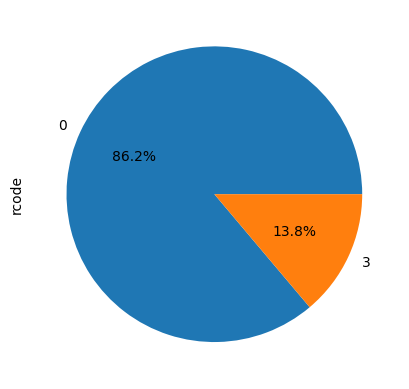

In [ ]:
dns_traffic.loc[dns_traffic['aa'] == 'true', 'rcode'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='rcode'>

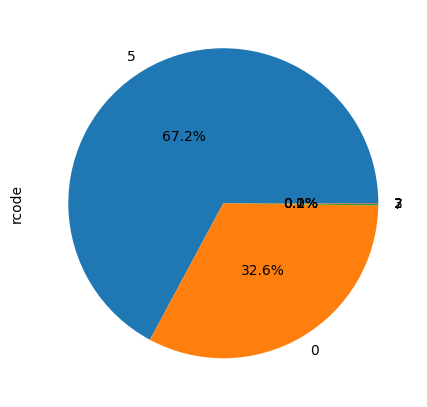

In [ ]:
dns_traffic.loc[dns_traffic['aa'] == 'false', 'rcode'].value_counts().plot.pie(figsize=(5,8), autopct='%1.1f%%', pctdistance=0.5)

<Axes: ylabel='rcode'>

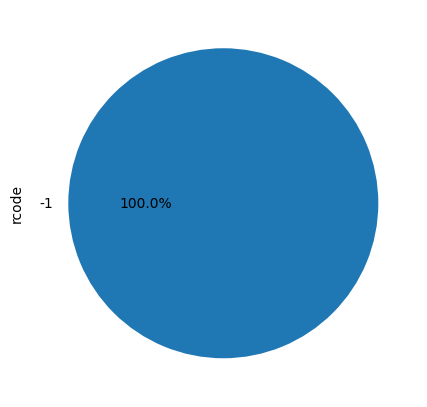

In [ ]:
dns_traffic.loc[dns_traffic['aa'].isna(), 'rcode'].value_counts().plot.pie(figsize=(5,8), autopct='%1.1f%%', pctdistance=0.5)

<Axes: ylabel='opcode'>

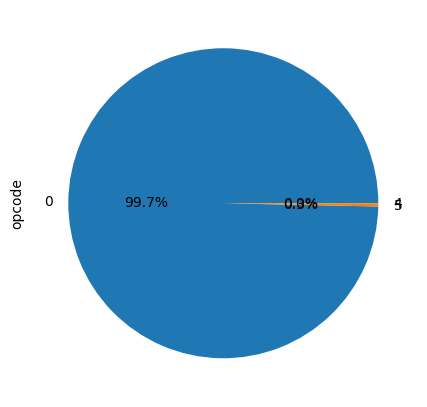

In [ ]:
dns_traffic.loc[dns_traffic['aa'].isna(), 'opcode'].value_counts().plot.pie(figsize=(5,8), autopct='%1.1f%%', pctdistance=0.5)

In [ ]:
dns_traffic.loc[dns_traffic['aa'].isna()].head()

,id,time,domainname,ttl,ipv,prot,src,srcp,dst,dstp,aa,tc,rd,ra,z,ad,cd,ancount,arcount,nscount,qdcount,opcode,rcode,qtype,qclass,country,asn,asn_organisation,edns_udp,edns_version,edns_do,edns_client_subnet,edns_other,edns_client_subnet_asn,edns_client_subnet_asn_organisation,edns_client_subnet_country,labels,proc_time,server_location,q_tc,q_ra,q_ad,pub_resolver,req_len,res_len,tcp_hs_rtt,req_ip_df,year,month,day,server,qname,datetime,epoch_time
6939,14154,18:42:25,vnnic.net.vn,39.0,4,17,3.210.44.234,11299,117.122.125.80,53,NaN,NaN,false,NaN,false,NaN,true,<NA>,<NA>,<NA>,1,0,-1,1.0,1.0,US,14616.0,AMAZON-AES,1472.0,0,true,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,false,false,false,NaN,51.0,NaN,NaN,NaN,2023,11,23,117.122.125.80,dns-hcm01.vnnic.net.vn.,2023-11-23 18:42:25,1700764945.175
6940,57667,18:42:25,vnnic.net.vn,43.0,4,17,3.210.44.234,7551,117.122.125.80,53,NaN,NaN,false,NaN,false,NaN,true,<NA>,<NA>,<NA>,1,0,-1,1.0,1.0,US,14616.0,AMAZON-AES,4096.0,0,true,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,false,false,false,NaN,51.0,NaN,NaN,NaN,2023,11,23,117.122.125.80,dns-hcm01.vnnic.net.vn.,2023-11-23 18:42:25,1700764945.547
6941,56903,18:46:27,203.in-addr.arpa,53.0,6,17,2001:dc8:1:c:0:0:0:27,46626,2001:dc8:c001:2:0:0:0:80,53,NaN,NaN,false,NaN,false,NaN,false,<NA>,<NA>,<NA>,1,0,-1,12.0,1.0,VN,23904.0,Vietnam Internet network information center VNNIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,false,false,false,NaN,45.0,NaN,NaN,NaN,2023,11,23,117.122.125.80,222.66.119.203.in-addr.arpa.,2023-11-23 18:46:27,1700765187.951
6942,6007,18:46:36,203.in-addr.arpa,55.0,6,17,2001:dc8:1:2:0:0:0:106,41540,2001:dc8:c001:2:0:0:0:80,53,NaN,NaN,false,NaN,false,NaN,false,<NA>,<NA>,<NA>,1,0,-1,12.0,1.0,VN,23904.0,Vietnam Internet network information center VNNIC,512.0,0,true,NaN,10.0,NaN,NaN,NaN,6,NaN,NaN,false,false,false,NaN,84.0,NaN,NaN,NaN,2023,11,23,117.122.125.80,204.66.119.203.in-addr.arpa.,2023-11-23 18:46:36,1700765196.531
6943,51500,18:46:32,vnnic.vn,108.0,4,17,3.228.181.34,33204,117.122.125.80,53,NaN,NaN,false,NaN,false,NaN,true,<NA>,<NA>,<NA>,1,0,-1,1.0,1.0,US,14616.0,AMAZON-AES,1232.0,0,true,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,false,false,false,NaN,45.0,NaN,NaN,NaN,2023,11,23,117.122.125.80,ns-hold.vnnic.vn.,2023-11-23 18:46:32,1700765192.017


In [ ]:
dns_traffic.loc[dns_traffic['aa'] == 'false'].head(5)

,id,time,domainname,ttl,ipv,prot,src,srcp,dst,dstp,aa,tc,rd,ra,z,ad,cd,ancount,arcount,nscount,qdcount,opcode,rcode,qtype,qclass,country,asn,asn_organisation,edns_udp,edns_version,edns_do,edns_client_subnet,edns_other,edns_client_subnet_asn,edns_client_subnet_asn_organisation,edns_client_subnet_country,labels,proc_time,server_location,q_tc,q_ra,q_ad,pub_resolver,req_len,res_len,tcp_hs_rtt,req_ip_df,year,month,day,server,qname,datetime,epoch_time
10,46628,18:41:54,203.in-addr.arpa,60.0,4,17,203.119.73.106,36338,117.122.125.80,53,false,false,false,false,false,false,false,0,1,0,1,0,5,12.0,1.0,VN,23904.0,Vietnam Internet network information center VNNIC,1232.0,0,true,NaN,10.0,NaN,NaN,NaN,6,0.0,NaN,false,false,false,NaN,84.0,84.0,NaN,false,2023,11,23,117.122.125.80,190.66.119.203.in-addr.arpa.,2023-11-23 18:41:54,1700764914.711
13,32716,18:41:54,203.in-addr.arpa,60.0,4,17,203.119.73.106,45698,117.122.125.80,53,false,false,false,false,false,false,false,0,1,0,1,0,5,12.0,1.0,VN,23904.0,Vietnam Internet network information center VNNIC,1232.0,0,true,NaN,10.0,NaN,NaN,NaN,6,0.0,NaN,false,false,false,NaN,84.0,84.0,NaN,false,2023,11,23,117.122.125.80,206.66.119.203.in-addr.arpa.,2023-11-23 18:41:54,1700764914.715
15,41052,18:41:55,203.in-addr.arpa,54.0,6,17,2001:dc8:1:c:0:0:0:27,37363,2001:dc8:c001:2:0:0:0:80,53,false,false,false,false,false,false,false,0,0,0,1,0,5,12.0,1.0,VN,23904.0,Vietnam Internet network information center VNNIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1.0,NaN,false,false,false,NaN,45.0,45.0,NaN,false,2023,11,23,117.122.125.80,206.66.119.203.in-addr.arpa.,2023-11-23 18:41:55,1700764915.547
16,53907,18:41:54,203.in-addr.arpa,60.0,4,17,203.119.73.106,56781,117.122.125.80,53,false,false,false,false,false,false,false,0,1,0,1,0,5,12.0,1.0,VN,23904.0,Vietnam Internet network information center VNNIC,1232.0,0,true,NaN,10.0,NaN,NaN,NaN,6,0.0,NaN,false,false,false,NaN,84.0,84.0,NaN,false,2023,11,23,117.122.125.80,221.66.119.203.in-addr.arpa.,2023-11-23 18:41:54,1700764914.717
17,65103,18:41:54,203.in-addr.arpa,59.0,4,17,203.119.75.28,47550,117.122.125.80,53,false,false,false,false,false,false,false,0,0,0,1,0,5,12.0,1.0,VN,23904.0,Vietnam Internet network information center VNNIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1.0,NaN,false,false,false,NaN,45.0,45.0,NaN,false,2023,11,23,117.122.125.80,208.66.119.203.in-addr.arpa.,2023-11-23 18:41:54,1700764914.315


### tc

In [ ]:
dns_traffic['tc'].value_counts(dropna=False)/len(dns_traffic)

false    0.833877
NaN      0.106599
true     0.059524
Name: tc, dtype: float64

In [ ]:
dns_traffic.loc[dns_traffic['tc'] == 'true'].head()   #response message bi cat ngan nay co dac diem gi???

,id,time,domainname,ttl,ipv,prot,src,srcp,dst,dstp,aa,tc,rd,ra,z,ad,cd,ancount,arcount,nscount,qdcount,opcode,rcode,qtype,qclass,country,asn,asn_organisation,edns_udp,edns_version,edns_do,edns_client_subnet,edns_other,edns_client_subnet_asn,edns_client_subnet_asn_organisation,edns_client_subnet_country,labels,proc_time,server_location,q_tc,q_ra,q_ad,pub_resolver,req_len,res_len,tcp_hs_rtt,req_ip_df,year,month,day,server,qname
3,12200,1700764914071,vnnic.vn,42.0,6,17,2600:1f14:804:fd01:25a6:683b:b66f:4169,12614,2001:dc8:c001:2:0:0:0:80,53,true,true,false,false,false,false,true,0,1,0,1,0,0,28.0,1.0,US,16512.0,AMAZON-02,512.0,0,true,NaN,NaN,NaN,NaN,NaN,3,0.0,NaN,false,false,false,NaN,45.0,45.0,NaN,false,2023,11,23,117.122.125.80,ns-hold.vnnic.vn.
37,36928,1700764915764,vnnic.vn,55.0,4,17,69.59.180.108,60941,117.122.125.80,53,true,true,false,false,false,false,false,0,1,0,1,0,0,43.0,1.0,US,22208.0,DATAPIPE-SEA,512.0,0,true,NaN,NaN,NaN,NaN,NaN,3,1.0,NaN,false,false,false,NaN,42.0,42.0,NaN,false,2023,11,23,117.122.125.80,dns2.vnnic.vn.
41,59407,1700764916107,vnnic.vn,45.0,6,17,2600:1f16:269:da00:70b:1d53:7469:a646,22192,2001:dc8:c001:2:0:0:0:80,53,true,true,false,false,false,false,true,0,1,0,1,0,0,28.0,1.0,US,16512.0,AMAZON-02,512.0,0,true,NaN,NaN,NaN,NaN,NaN,3,1.0,NaN,false,false,false,NaN,45.0,45.0,NaN,false,2023,11,23,117.122.125.80,ns-hold.vnnic.vn.
46,20473,1700764915765,vnnic.vn,55.0,4,17,69.59.180.108,44846,117.122.125.80,53,true,true,false,false,false,false,false,0,1,0,1,0,0,43.0,1.0,US,22208.0,DATAPIPE-SEA,512.0,0,true,NaN,NaN,NaN,NaN,NaN,3,0.0,NaN,false,false,false,NaN,42.0,42.0,NaN,false,2023,11,23,117.122.125.80,dns3.vnnic.vn.
48,35900,1700764915789,vnnic.vn,54.0,6,17,2402:800:20ff:1092:0:0:0:3b64,64002,2001:dc8:c001:2:0:0:0:80,53,true,true,false,false,false,false,true,0,1,0,1,0,0,28.0,1.0,VN,7552.0,Viettel Group,512.0,0,true,NaN,10.0,NaN,NaN,NaN,3,0.0,NaN,false,false,false,NaN,57.0,73.0,NaN,false,2023,11,23,117.122.125.80,ns-hold.vnnic.vn.


In [ ]:
dns_traffic.loc[dns_traffic['tc'].isna()].tail()

,id,time,domainname,ttl,ipv,prot,src,srcp,dst,dstp,aa,tc,rd,ra,z,ad,cd,ancount,arcount,nscount,qdcount,opcode,rcode,qtype,qclass,country,asn,asn_organisation,edns_udp,edns_version,edns_do,edns_client_subnet,edns_other,edns_client_subnet_asn,edns_client_subnet_asn_organisation,edns_client_subnet_country,labels,proc_time,server_location,q_tc,q_ra,q_ad,pub_resolver,req_len,res_len,tcp_hs_rtt,req_ip_df,year,month,day,server,qname,datetime,epoch_time
10710414,1279,23:58:20,i-speed.vn,53.0,4,17,188.191.18.252,11851,203.119.73.80,53,NaN,NaN,false,NaN,false,NaN,true,<NA>,<NA>,<NA>,1,0,-1,5.0,1.0,RU,28768.0,CrimeaCom South LLC,4096.0,0,true,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,false,false,false,NaN,46.0,NaN,NaN,NaN,2023,11,23,203.119.73.80,glover.i-speed.vn.,2023-11-23 23:58:20,1700783900.115
10710415,45370,23:59:48,i-speed.vn,49.0,6,17,2001:b000:180:8001:0:1:11:194,7179,2001:dc8:1:2:0:0:0:80,53,NaN,NaN,false,NaN,false,NaN,true,<NA>,<NA>,<NA>,1,0,-1,5.0,1.0,TW,3462.0,Data Communication Business Group,1232.0,0,true,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,false,false,false,NaN,57.0,NaN,NaN,NaN,2023,11,23,203.119.73.80,plattsburgh-piv-1.i-speed.vn.,2023-11-23 23:59:48,1700783988.342
10710416,36215,23:59:28,i-speed.vn,121.0,6,17,2a00:1450:4013:c07:0:0:0:105,47385,2001:dc8:1:2:0:0:0:80,53,NaN,NaN,false,NaN,false,NaN,true,<NA>,<NA>,<NA>,1,0,-1,5.0,1.0,NL,15168.0,GOOGLE,1400.0,0,true,"4,213.181.106.0/24,0",NaN,44735,Nova hf,IS,4,NaN,NaN,false,false,false,Google,59.0,NaN,NaN,NaN,2023,11,23,203.119.73.80,www.tube.i-speed.vn.,2023-11-23 23:59:28,1700783968.623
10710417,36577,23:58:55,vnnic.vn,49.0,6,17,2001:b000:180:8001:0:1:11:135,60675,2001:dc8:1:2:0:0:0:80,53,NaN,NaN,false,NaN,false,NaN,true,<NA>,<NA>,<NA>,1,0,-1,28.0,1.0,TW,3462.0,Data Communication Business Group,1232.0,0,true,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,false,false,false,NaN,42.0,NaN,NaN,NaN,2023,11,23,203.119.73.80,dns1.vnnic.vn.,2023-11-23 23:58:55,1700783935.316
10710418,41217,23:59:20,i-speed.vn,120.0,4,17,74.125.17.231,41019,203.119.73.80,53,NaN,NaN,false,NaN,false,NaN,true,<NA>,<NA>,<NA>,1,0,-1,5.0,1.0,US,15168.0,GOOGLE,1400.0,0,true,"4,38.65.135.0/24,0",NaN,263157,Tu Casa Inalambrica de Mexico,MX,3,NaN,NaN,false,false,false,Google,57.0,NaN,NaN,NaN,2023,11,23,203.119.73.80,cadmin.i-speed.vn.,2023-11-23 23:59:20,1700783960.399


In [ ]:
dns_traffic['q_tc'].value_counts(dropna=False)/len(dns_traffic)

false    0.93005
NaN      0.06995
Name: q_tc, dtype: float64

### ra

In [ ]:
dns_traffic['ra'].value_counts(dropna=False)/len(dns_traffic)

false    0.860629
NaN      0.106599
true     0.032772
Name: ra, dtype: float64

### rd

In [ ]:
dns_traffic['rd'].value_counts(dropna=False)/len(dns_traffic)

false    0.898126
NaN      0.069950
true     0.031923
Name: rd, dtype: float64

In [ ]:
len(dns_traffic.loc[(dns_traffic['ra'] == 'true') & (dns_traffic['rd'] == 'true') ])/len(dns_traffic)

0.02611261053372422

In [ ]:
dns_traffic['rcode'].value_counts(dropna=False)/len(dns_traffic)

0       0.715986
3       0.109849
-1      0.106599
5       0.067341
7       0.000167
2       0.000059
<NA>         0.0
Name: rcode, dtype: Float64

In [ ]:
dns_traffic.loc[(dns_traffic['rcode'] == 0) & (dns_traffic['ra'].isna()) ]

,id,time,domainname,ttl,ipv,prot,src,srcp,dst,dstp,aa,tc,rd,ra,z,ad,cd,ancount,arcount,nscount,qdcount,opcode,rcode,qtype,qclass,country,asn,asn_organisation,edns_udp,edns_version,edns_do,edns_client_subnet,edns_other,edns_client_subnet_asn,edns_client_subnet_asn_organisation,edns_client_subnet_country,labels,proc_time,server_location,q_tc,q_ra,q_ad,pub_resolver,req_len,res_len,tcp_hs_rtt,req_ip_df,year,month,day,server,qname,datetime,epoch_time


#2. EDA

##. Domain enumeration overtime (queries/second)
host vs all

In [ ]:
from time import strftime
from datetime import datetime
# from time import localtime
# localtime(df1[0])
# strftime('%H:%M:%S', localtime(df1[0]))
# df1 = np.floor(df1/1000)
# df1.value_counts()

In [ ]:
dns_traffic =add_datetime(dns_traffic)
df_tmp = dns_traffic[['qname','domainname', 'time', 'datetime', 'epoch_time', 'src','dst', 'ttl', 'opcode', 'rcode', ]]
#del dns_traffic

#lst_domainname = df_tmp['domainname'].unique()
#df_domainname0 = df_tmp.loc[df_tmp['domainname'] == lst_domainname[0]]

In [ ]:
df_tmp = df_tmp[(df_tmp['datetime'] > pd.to_datetime('2023-11-23 20:00:00')) & (df_tmp['datetime'] < pd.to_datetime('2023-11-24 04:00:00'))]

#df_domainname0 = df_tmp.loc[df_tmp['domainname'] == lst_domainname[0]]



## Queries/1s over time with rcode

<Axes: ylabel='Queries per second'>

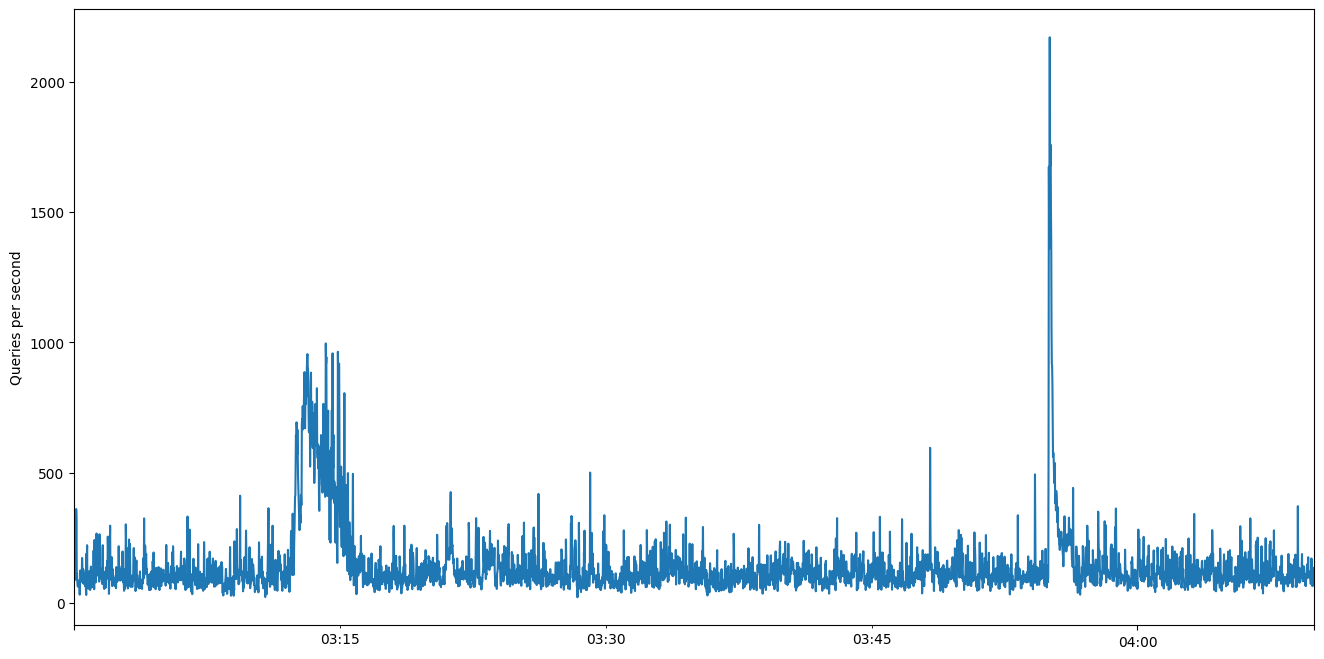

In [ ]:
#df_tmp = df_tmp[(df_tmp['datetime'] > pd.to_datetime('2023-11-23 23:40:00')) & (df_tmp['datetime'] < pd.to_datetime('2023-11-24 00:10:00'))]
df_tmp = df_tmp[(df_tmp['datetime'] > pd.to_datetime('2023-12-24 03:00:00')) & (df_tmp['datetime'] < pd.to_datetime('2023-12-24 04:10:00'))]

df_tmp['datetime'].value_counts().sort_index().plot(kind = 'line', figsize=(16,8), ylabel = 'Queries per second')

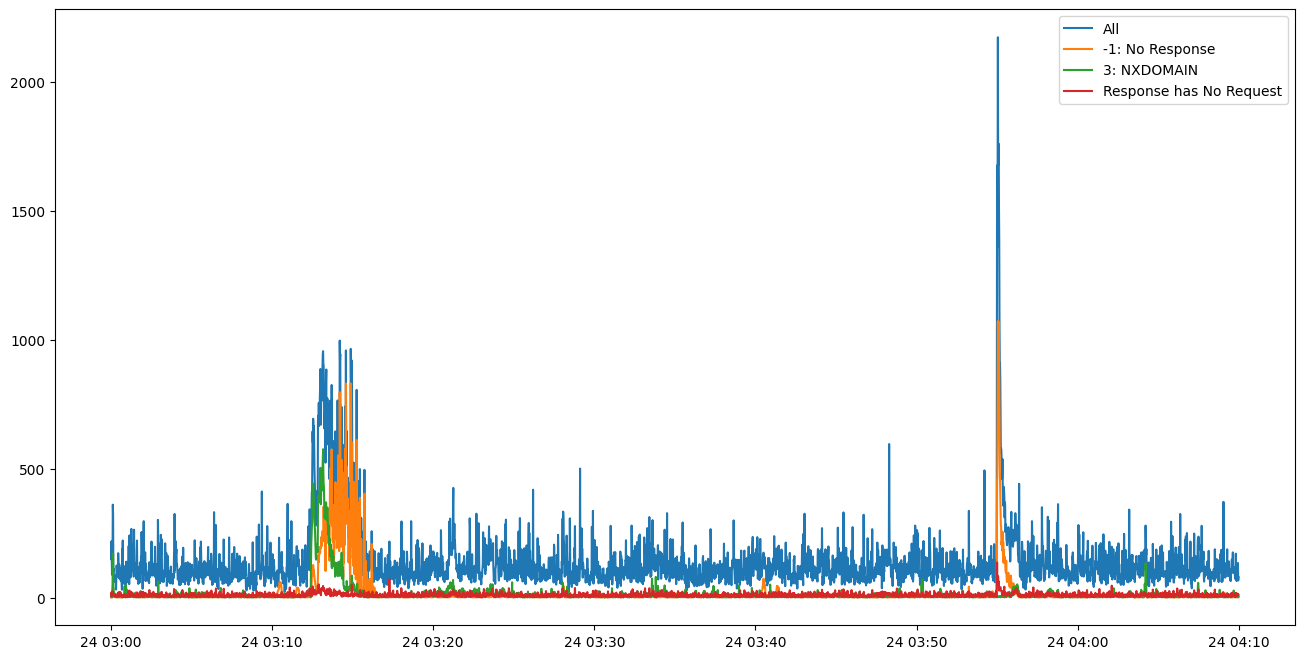

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_tmp['datetime'].value_counts().sort_index(), label ='All')
plt.plot(df_tmp.loc[(df_tmp['rcode'] == -1)   ,'datetime'].value_counts().sort_index(), label ='-1: No Response')
plt.plot(df_tmp.loc[(df_tmp['rcode'] == 3)   ,'datetime'].value_counts().sort_index(), label ='3: NXDOMAIN')
plt.plot(df_tmp.loc[(df_tmp['ttl'].isna())   ,'datetime'].value_counts().sort_index(), label ='Response has No Request')

plt.legend()
plt.show()

In [ ]:
print(len(dns_traffic[dns_traffic['z'].isna() ]) )        #request has no response, response has no request dont match
print(len(dns_traffic[dns_traffic['rcode'] == -1]) )
dns_traffic[dns_traffic['ttl'].isna()].merge(dns_traffic[dns_traffic['rcode'] == -1], how='inner', left_on = ['id', 'src', 'srcp'], right_on =['id', 'src', 'srcp']).head()

387619
154011


,id,time_x,domainname_x,ttl_x,ipv_x,prot_x,src,srcp,dst_x,dstp_x,...,q_ra_y,q_ad_y,pub_resolver_y,req_len_y,res_len_y,req_ip_df_y,server_y,qname_y,datetime_y,epoch_time_y
0,27319,22:40:25,vnnic.vn,NaN,4,17,104.211.85.88,52420,203.119.73.80,53,...,false,false,NaN,45.0,NaN,NaN,203.119.64.80,ns-hold.vnnic.vn.,2023-12-23 22:40:21,1703371221.391
1,10623,03:55:01,42.in-addr.arpa,NaN,6,17,2400:cb00:4:1024:0:0:ac45:155a,37432,2001:dc8:1:2:0:0:0:80,53,...,false,false,CloudFlare,53.0,NaN,NaN,203.119.73.80,232.6.96.42.in-addr.arpa.,2023-12-24 03:55:01,1703390101.605
2,42353,03:55:03,42.in-addr.arpa,NaN,6,17,2400:cb00:465:1024:0:0:ac45:8582,49718,2001:dc8:1:2:0:0:0:80,53,...,false,false,CloudFlare,53.0,NaN,NaN,203.119.73.80,243.6.96.42.in-addr.arpa.,2023-12-24 03:55:03,1703390103.726
3,21610,03:03:04,vnnic.vn,NaN,4,6,36.155.10.69,43806,203.119.73.80,53,...,false,false,NaN,47.0,NaN,NaN,203.119.73.80,ns-hold.vnnic.vn.,2023-12-24 03:03:04,1703386984.043
4,1033,02:06:38,vnnic.vn,NaN,6,6,2607:f798:180:0:0:992:1200:8,58637,2001:dc8:9000:2:0:0:0:80,53,...,false,false,NaN,47.0,NaN,NaN,203.119.64.80,ns-hold.vnnic.vn.,2023-12-24 02:06:38,1703383598.791


Tong so luong query: 586318.0


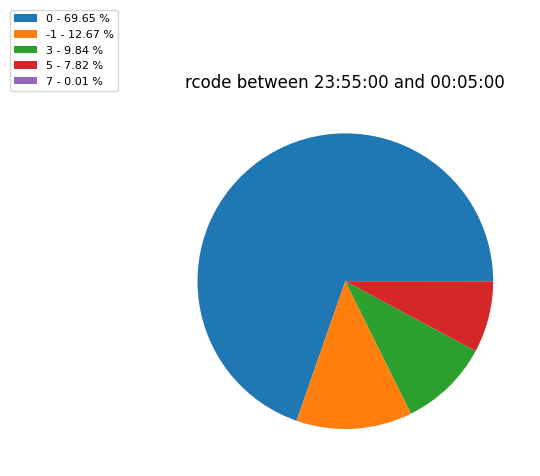

In [ ]:
# explore r code in the time of burst query

df_tmp1 = df_tmp[(df_tmp['datetime'] > pd.to_datetime('2023-11-23 23:55:00')) & (df_tmp['datetime'] < pd.to_datetime('2023-11-24 00:05:00'))]

sum1 = len(df_tmp)/100
print('Tong so luong query:', sum1*100)

pie1, texts = plt.pie(df_tmp['rcode'].value_counts() )
label_pie1 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df_tmp['rcode'].value_counts().index, df_tmp['rcode'].value_counts()/sum1 )]
plt.title("rcode between 23:55:00 and 00:05:00", loc = 'center')
plt.legend(pie1,label_pie1, loc='lower right', bbox_to_anchor=(-0.1, 1.), fontsize=8)
plt.show()
del sum1, pie1, texts, label_pie1, df_tmp1


###. With src

In [ ]:
#view of each src, dst/all (stacked graph)
#all time: message between dns server, cache
df_tmp['src'].value_counts().head(10)

3.239.152.40      14288
203.119.73.80     11107
3.209.84.96       10970
3.239.153.33      10183
3.228.170.212      9832
3.239.153.70       9768
44.192.144.166     9604
3.239.153.221      8772
3.228.171.45       8369
203.119.64.80      6886
Name: src, dtype: int64

In [ ]:
df_tmp.loc[df_tmp['src'].str.contains ('3.239'), 'src'].value_counts()

In [ ]:
df_tmp.loc[df_tmp['src'].str.contains ('3.239'), 'domainname'].value_counts().head()

203.in-addr.arpa    42937
vnnic.vn             3327
vnnic.net.vn          109
dnssec.vn              12
42.in-addr.arpa        10
Name: domainname, dtype: int64

In [ ]:
df_tmp['domainname'].value_counts().head()

vnnic.vn            317461
203.in-addr.arpa    136072
i-speed.vn           68219
42.in-addr.arpa      30397
vnnic.net.vn         15394
Name: domainname, dtype: int64

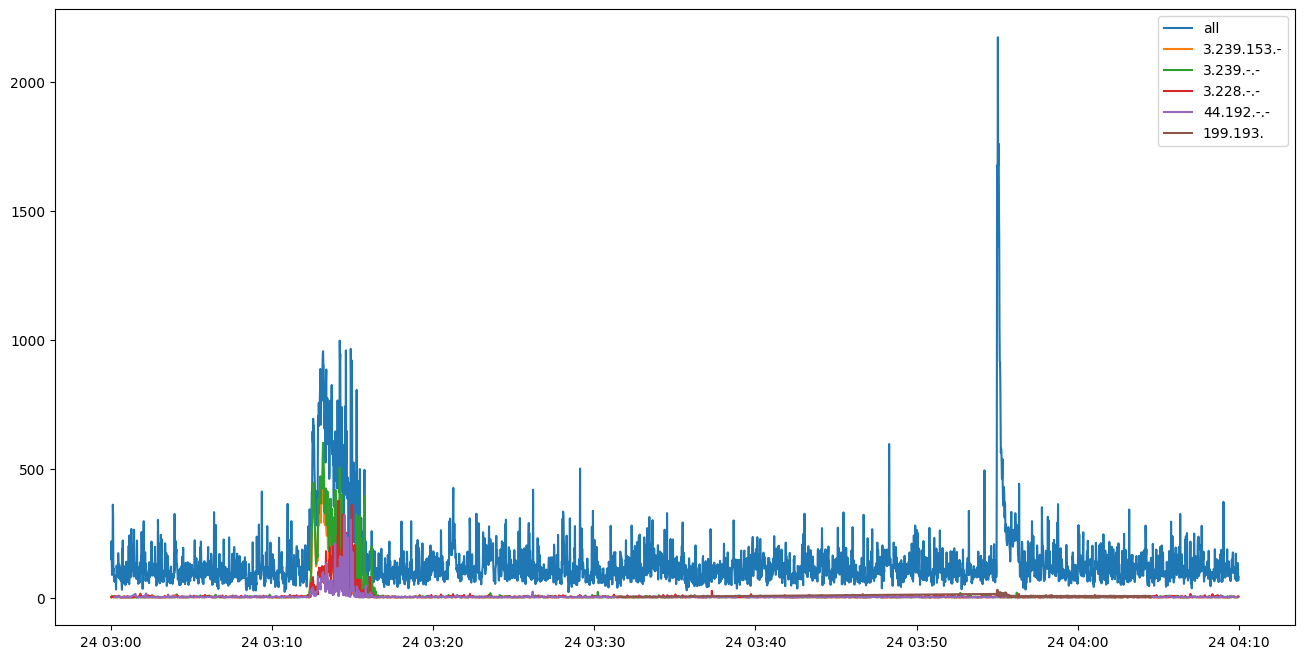

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(df_tmp['datetime'].value_counts().sort_index(),  label ='all')
#plt.plot(df_tmp.loc[df_tmp['src'].str.contains ('3.239.152') | df_tmp['dst'].str.contains ('3.239.152') ,'datetime'].value_counts().sort_index(), label ='3.239.152:--')
plt.plot(df_tmp.loc[df_tmp['src'].str.contains ('3.239.153')  ,'datetime'].value_counts().sort_index(), label ='3.239.153.-')
plt.plot(df_tmp.loc[df_tmp['src'].str.contains ('3.239')  ,'datetime'].value_counts().sort_index(), label ='3.239.-.-')
plt.plot(df_tmp.loc[df_tmp['src'].str.contains ('3.228')  ,'datetime'].value_counts().sort_index(), label ='3.228.-.-')
plt.plot(df_tmp.loc[df_tmp['src'].str.contains ('44.192.')  ,'datetime'].value_counts().sort_index(), label ='44.192.-.-')
plt.plot(df_tmp.loc[df_tmp['src'].str.contains ('199.193.')  ,'datetime'].value_counts().sort_index(), label ='199.193.')

#2001:dc8:1
plt.legend()
plt.show()


In [ ]:
  #view each rcode/src over time
plt.figure(figsize = (16,8))
plt.plot(df_tmp['datetime'].value_counts().sort_index(), label = "All")

plt.plot(df_tmp.loc[(df_tmp['rcode'] == -1)   ,'datetime'].value_counts().sort_index(), label ='-1: No Response')
plt.plot(df_tmp.loc[(df_tmp['rcode'] == 3)  ,'datetime'].value_counts().sort_index(), label ='3: NXDOMAIN')

plt.legend()
plt.show()

In [ ]:


#each location of the queries
df_tmp.head()

,domainname,time,datetime,epoch_time,src,ttl,opcode,rcode
97027,vnnic.vn,00:01:54,2023-11-24 00:01:54,1700784114.013,2605:a140:5028:0:0:0:2:53,45.0,0,0
97028,vnnic.vn,00:01:54,2023-11-24 00:01:54,1700784114.048,2a02:6b8:c14:52ab:0:51f2:6adb:0,34.0,0,0
97029,i-speed.vn,00:01:54,2023-11-24 00:01:54,1700784114.092,20.38.153.10,109.0,0,3
97030,i-speed.vn,00:01:54,2023-11-24 00:01:54,1700784114.136,2001:b000:180:8002:0:2:9:36,51.0,0,3
97031,42.in-addr.arpa,00:01:54,2023-11-24 00:01:54,1700784114.137,2a04:e4c0:61:0:0:0:0:67,56.0,0,5


<Axes: xlabel='datetime'>

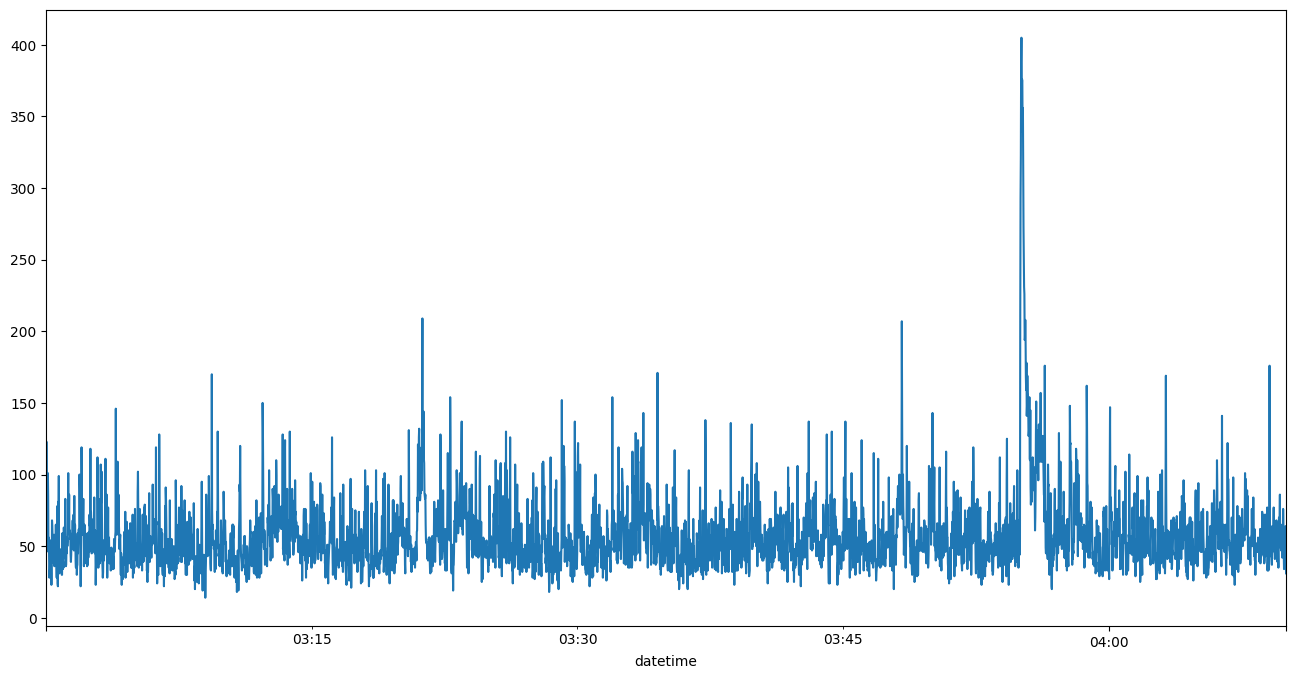

In [ ]:
## Unique IP/1s overtime (subnet !?)
df_tmp[['datetime', 'src']].groupby('datetime')['src'].nunique().plot(kind = 'line', figsize = (16,8))

## Domain name enumeration overtime

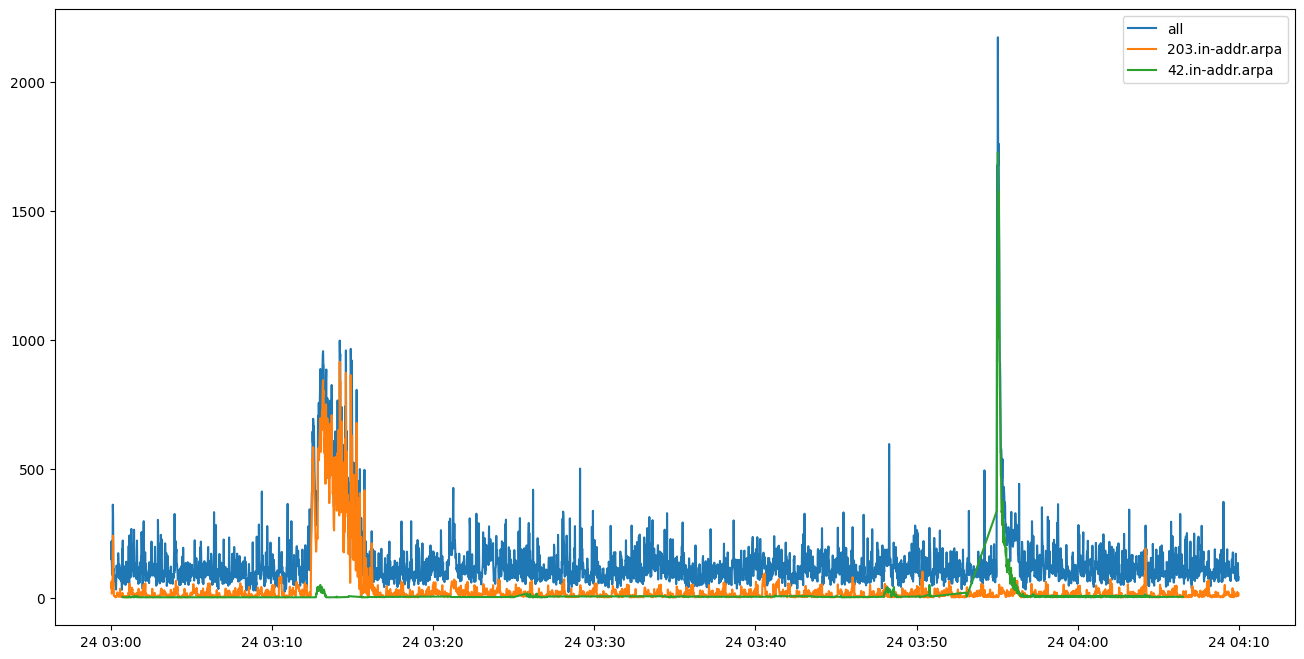

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(df_tmp['datetime'].value_counts().sort_index(),  label ='all')
#plt.plot(df_tmp.loc[df_tmp['src'].str.contains ('3.239.152') | df_tmp['dst'].str.contains ('3.239.152') ,'datetime'].value_counts().sort_index(), label ='3.239.152:--')
plt.plot(df_tmp.loc[df_tmp['domainname'] == '203.in-addr.arpa'  ,'datetime'].value_counts().sort_index(), label ='203.in-addr.arpa')
plt.plot(df_tmp.loc[df_tmp['domainname'] == '42.in-addr.arpa'  ,'datetime'].value_counts().sort_index(), label ='42.in-addr.arpa')

#42. from variety sources

plt.legend()
plt.show()


In [ ]:
plt.figure(figsize = (16,8))
plt.plot(df_tmp['datetime'].value_counts().sort_index(),  label ='all')
#plt.plot(df_tmp.loc[df_tmp['src'].str.contains ('3.239.152') | df_tmp['dst'].str.contains ('3.239.152') ,'datetime'].value_counts().sort_index(), label ='3.239.152:--')
plt.plot(df_tmp.loc[df_tmp['domainname'] == '203.in-addr.arpa'  ,'datetime'].value_counts().sort_index(), label ='203.in-addr.arpa')
plt.plot(df_tmp.loc[df_tmp['domainname'] == '42.in-addr.arpa'  ,'datetime'].value_counts().sort_index(), label ='42.in-addr.arpa')


plt.legend()
plt.show()


In [ ]:
len(df_tmp)

586318

<Axes: xlabel='datetime'>

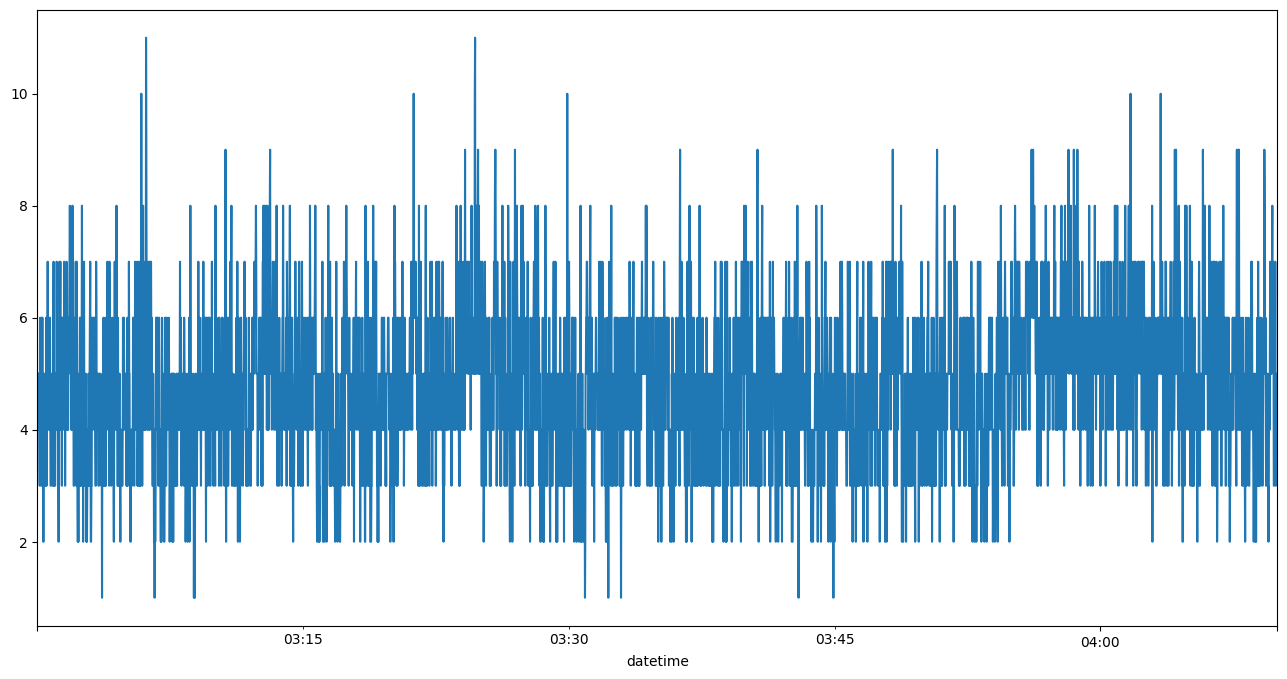

In [ ]:
df_tmp[['datetime', 'domainname']].groupby('datetime')['domainname'].nunique().plot(kind = 'line', figsize = (16,8))

<Axes: xlabel='datetime'>

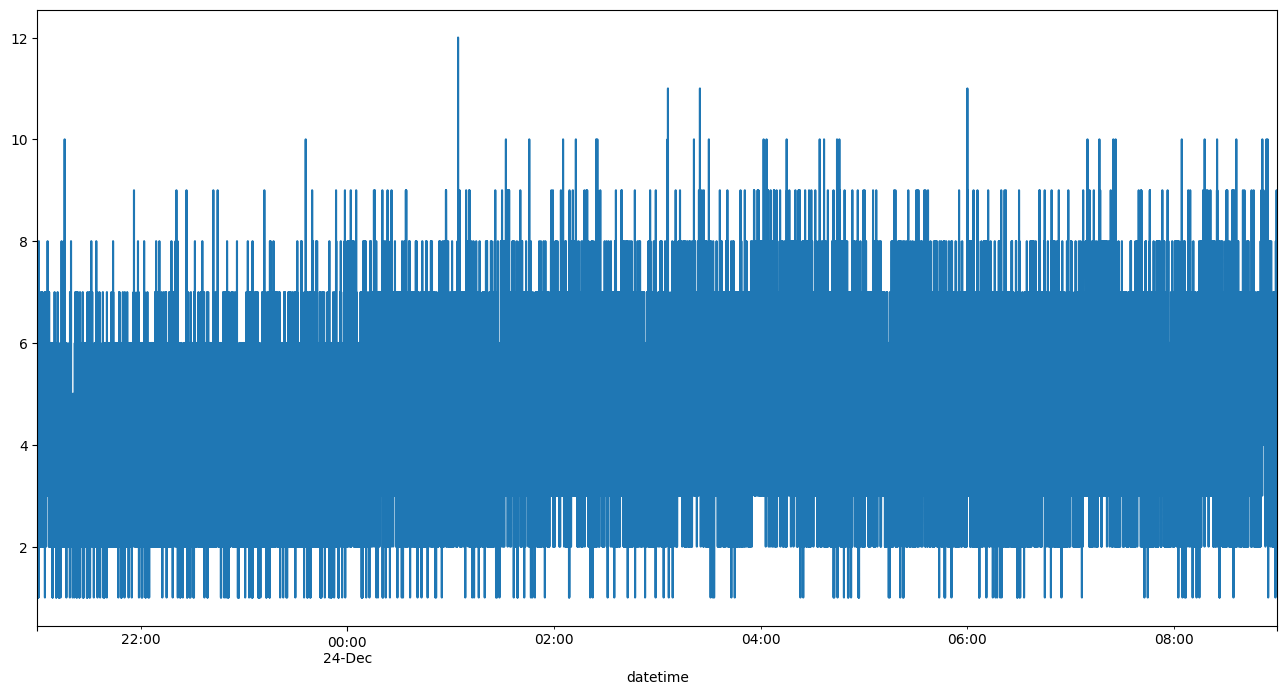

In [ ]:
# unique domainname/1s
dns_traffic[['datetime', 'domainname']].groupby('datetime')['domainname'].nunique().plot(kind = 'line', figsize = (16,8))

<Axes: xlabel='datetime'>

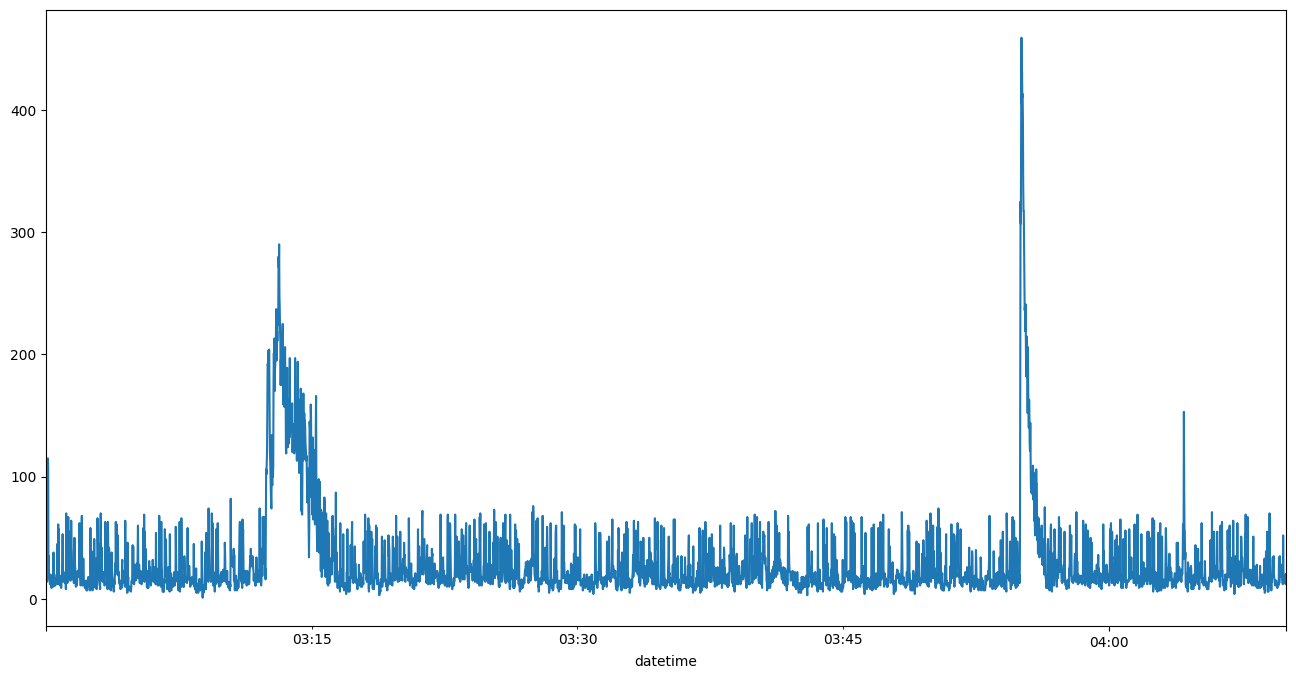

In [ ]:
#unique qname/1s
df_tmp[['datetime', 'qname']].groupby('datetime')['qname'].nunique().plot(figsize = (16,8))

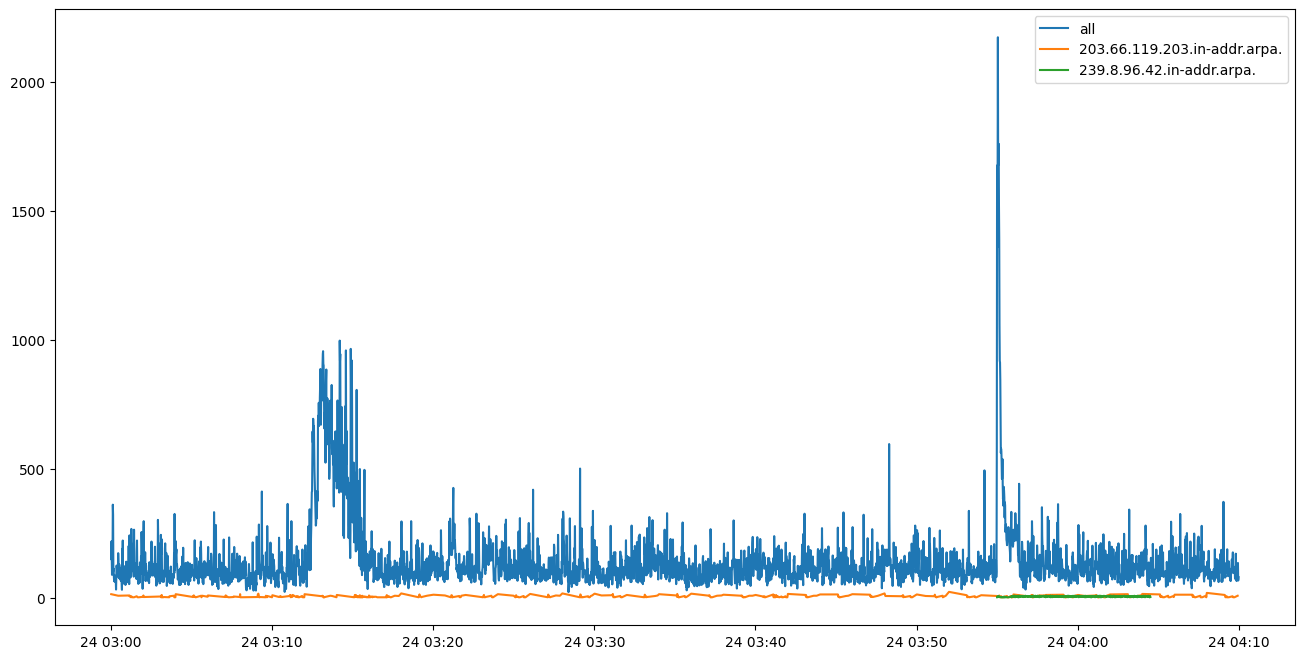

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(df_tmp['datetime'].value_counts().sort_index(),  label ='all')
#plt.plot(df_tmp.loc[df_tmp['src'].str.contains ('3.239.152') | df_tmp['dst'].str.contains ('3.239.152') ,'datetime'].value_counts().sort_index(), label ='3.239.152:--')
plt.plot(df_tmp.loc[df_tmp['qname'] == '203.66.119.203.in-addr.arpa.'  ,'datetime'].value_counts().sort_index(), label ='203.66.119.203.in-addr.arpa.')
plt.plot(df_tmp.loc[df_tmp['qname'] == '239.8.96.42.in-addr.arpa.'  ,'datetime'].value_counts().sort_index(), label ='239.8.96.42.in-addr.arpa.')


plt.legend()
plt.show()


In [ ]:
df_tmp['qname'].value_counts().head(50)

ns-hold.vnnic.vn.                  186403
vnnic.vn.                           26825
dns3.vnnic.vn.                      24977
dns1.vnnic.vn.                      24670
dns2.vnnic.vn.                      24145
worker-04.bigdata.vnnic.vn.         16544
dns-hcm01.vnnic.net.vn.              6262
dns1.vnnic.net.vn.                   6004
speedtest.vn.                        3871
cmc-hn01.i-speed.vn.                 3252
dns-master.vnnic.vn.                 3210
www.vnnic.vn.                        3018
203.66.119.203.in-addr.arpa.         2632
239.8.96.42.in-addr.arpa.            2120
221.66.119.203.in-addr.arpa.         2067
99.66.119.203.in-addr.arpa.          2028
27.75.119.203.in-addr.arpa.          1971
222.66.119.203.in-addr.arpa.         1944
125.66.119.203.in-addr.arpa.         1876
132.66.119.203.in-addr.arpa.         1806
205.66.119.203.in-addr.arpa.         1777
206.66.119.203.in-addr.arpa.         1732
138.66.119.203.in-addr.arpa.         1729
207.66.119.203.in-addr.arpa.      

In [ ]:
df_tmp.loc[df_tmp['qname'].str.contains('42.in-addr.arpa', na = False),'qname'].value_counts().head()

239.8.96.42.in-addr.arpa.    2120
104.6.96.42.in-addr.arpa.     556
104.8.96.42.in-addr.arpa.     517
103.6.96.42.in-addr.arpa.     484
8.96.42.in-addr.arpa.         477
Name: qname, dtype: int64

In [ ]:
df_tmp.loc[df_tmp['qname'].str.contains('42.in-addr.arpa', na = False),'rcode'].value_counts().head()

-1    15841
5     14556
Name: rcode, dtype: Int64

In [ ]:
dns_traffic.loc[dns_traffic['qname'].str.contains('42.in-addr.arpa', na = False),'rcode'].value_counts().head()

5     47372
-1    21475
Name: rcode, dtype: Int64

In [ ]:
dns_traffic.loc[dns_traffic['rcode'] == 3, 'domainname'].value_counts()

vnnic.net.vn                120595
203.in-addr.arpa             85093
vnnic.vn                     20389
2.ip6.arpa                   15047
117.in-addr.arpa              9161
                             ...  
xn--danhbweb-rx0d.vn             1
xn--achip-4ya3734cma.vn          1
xn--tmkimweb-21a7647e.vn         1
ipv6ready.vn                     1
dotvndomains.vn                  1
Name: domainname, Length: 70, dtype: int64

In [ ]:
df_tmp.loc[df_tmp['qname'].str.contains('203.in-addr.arpa', na = False) & (df_tmp['rcode'] == 0 ) & (df_tmp['dst'] == "203.119.73.80") ]#,  ].value_counts().head()

,qname,domainname,time,datetime,epoch_time,src,dst,ttl,opcode,rcode
91363,105.44.119.203.in-addr.arpa.,203.in-addr.arpa,03:48:31,2023-12-24 03:48:31,1703389711.591,123.51.159.90,203.119.73.80,112.0,0,0
91364,105.44.119.203.in-addr.arpa.,203.in-addr.arpa,03:48:31,2023-12-24 03:48:31,1703389711.591,123.51.159.90,203.119.73.80,NaN,0,0
91377,27.75.119.203.in-addr.arpa.,203.in-addr.arpa,03:48:34,2023-12-24 03:48:34,1703389714.291,74.125.114.208,203.119.73.80,121.0,0,0
91389,80.64.119.203.in-addr.arpa.,203.in-addr.arpa,03:48:33,2023-12-24 03:48:33,1703389713.693,89.162.80.181,203.119.73.80,53.0,0,0
91421,27.75.119.203.in-addr.arpa.,203.in-addr.arpa,03:48:35,2023-12-24 03:48:35,1703389715.254,177.73.231.130,203.119.73.80,48.0,0,0
...,...,...,...,...,...,...,...,...,...,...
4631585,80.64.119.203.in-addr.arpa.,203.in-addr.arpa,03:23:15,2023-12-24 03:23:15,1703388195.702,93.158.164.86,203.119.73.80,54.0,0,0
4631595,80.64.119.203.in-addr.arpa.,203.in-addr.arpa,03:23:14,2023-12-24 03:23:14,1703388194.742,200.54.62.18,203.119.73.80,49.0,0,0
4631659,80.64.119.203.in-addr.arpa.,203.in-addr.arpa,03:23:19,2023-12-24 03:23:19,1703388199.655,185.17.215.45,203.119.73.80,43.0,0,0
4631667,80.64.119.203.in-addr.arpa.,203.in-addr.arpa,03:23:19,2023-12-24 03:23:19,1703388199.657,185.17.215.45,203.119.73.80,43.0,0,0


In [ ]:
df_tmp.loc[df_tmp['qname'].str.contains('203.in-addr.arpa', na = False) & (df_tmp['rcode'] == 0 ) & (df_tmp['dst'] == "203.119.73.80") ].merge(
    df_tmp.loc[df_tmp['qname'].str.contains('203.in-addr.arpa', na = False) & (df_tmp['rcode'] == 5 ) & (df_tmp['dst'] == "203.119.73.80") ],
    on = 'qname')

,qname,domainname_x,time_x,datetime_x,epoch_time_x,src_x,dst_x,ttl_x,opcode_x,rcode_x,domainname_y,time_y,datetime_y,epoch_time_y,src_y,dst_y,ttl_y,opcode_y,rcode_y


In [ ]:
df_tmp.loc[df_tmp['qname'].str.contains('203.in-addr.arpa', na = False) ,'rcode' ].value_counts().head()

-1    57298
3     38529
5     29858
0     10387
Name: rcode, dtype: Int64

In [ ]:
df_tmp.loc[df_tmp['qname'].str.contains('203.in-addr.arpa', na = False) & (df_tmp['rcode'] == 5), 'dst' ].value_counts().head()

203.119.73.80               10325
203.119.64.80                5757
117.122.125.80               5707
2001:dc8:1:2:0:0:0:80        3373
2001:dc8:c001:2:0:0:0:80     2382
Name: dst, dtype: int64

In [ ]:
df_tmp.loc[(df_tmp['domainname'] == '203.in-addr.arpa') & (df_tmp['rcode'] == 0), 'src'].value_counts()

203.119.73.80                  487
203.119.64.80                  296
190.104.211.2                  117
200.123.188.2                  111
186.250.56.99                  103
                              ... 
172.217.43.138                   1
74.125.46.3                      1
173.194.93.5                     1
62.162.32.21                     1
2402:800:20ff:3051:0:0:0:21      1
Name: src, Length: 2615, dtype: int64

In [ ]:
df_tmp['qname'].value_counts()

ns-hold.vnnic.vn.                                                            186403
vnnic.vn.                                                                     26825
dns3.vnnic.vn.                                                                24977
dns1.vnnic.vn.                                                                24670
dns2.vnnic.vn.                                                                24145
                                                                              ...  
dns-hdns-master.vnnic.vn.                                                         1
random.ipv6event2012.vn.                                                          1
154.253.59.10.in-addr.arpa.                                                       1
1.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.1.0.0.0.3.8.c.d.0.1.0.0.2.ip6.arpa.         1
isatap.nscache2.vnnic.net.vn.                                                     1
Name: qname, Length: 5726, dtype: int64

In [ ]:
df_tmp.loc[df_tmp['qname'].str.contains('203.in-addr.arpa', na = False)]#,'src'].value_counts().head(10)

,qname,domainname,time,datetime,epoch_time,src,dst,ttl,opcode,rcode
5871,215.72.119.203.in-addr.arpa.,203.in-addr.arpa,03:40:22,2023-12-24 03:40:22,1703389222.024,2600:141b:6800:15:0:0:17dd:de0c,2001:dc8:9000:2:0:0:0:80,49.0,0,3
5872,238.10.119.203.in-addr.arpa.,203.in-addr.arpa,03:40:24,2023-12-24 03:40:24,1703389224.41,172.253.4.1,203.119.64.80,61.0,0,3
5880,44.119.203.in-addr.arpa.,203.in-addr.arpa,03:40:24,2023-12-24 03:40:24,1703389224.946,172.253.199.196,203.119.64.80,121.0,0,0
5901,190.66.119.203.in-addr.arpa.,203.in-addr.arpa,03:40:26,2023-12-24 03:40:26,1703389226.865,2001:dc8:1:c:0:0:0:27,2001:dc8:9000:2:0:0:0:80,55.0,0,5
5906,219.10.119.203.in-addr.arpa.,203.in-addr.arpa,03:40:26,2023-12-24 03:40:26,1703389226.244,37.27.61.76,203.119.64.80,57.0,0,3
...,...,...,...,...,...,...,...,...,...,...
4641396,207.66.119.203.in-addr.arpa.,203.in-addr.arpa,03:23:22,2023-12-24 03:23:22,1703388202.042,203.119.75.27,203.119.73.80,63.0,0,5
4641397,207.66.119.203.in-addr.arpa.,203.in-addr.arpa,03:23:22,2023-12-24 03:23:22,1703388202.042,203.119.75.27,203.119.73.80,NaN,0,5
4641418,138.66.119.203.in-addr.arpa.,203.in-addr.arpa,03:23:27,2023-12-24 03:23:27,1703388207.68,203.119.75.27,203.119.73.80,63.0,0,5
4641420,207.66.119.203.in-addr.arpa.,203.in-addr.arpa,03:23:29,2023-12-24 03:23:29,1703388209.283,203.119.75.27,203.119.73.80,63.0,0,5


<Axes: ylabel='domainname'>

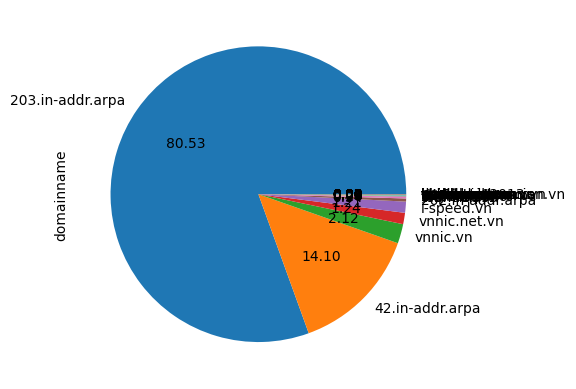

In [ ]:
dns_traffic.loc[dns_traffic['rcode'] == -1, 'domainname'].value_counts().plot(kind = 'pie', autopct = '%.2f')

<Axes: ylabel='domainname'>

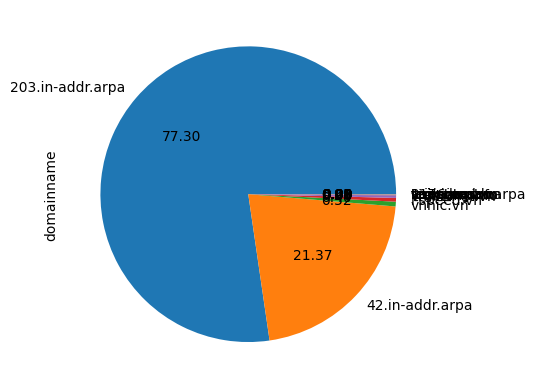

In [ ]:
df_tmp.loc[df_tmp['rcode'] == -1, 'domainname'].value_counts().plot(kind = 'pie', autopct = '%.2f')

<Axes: ylabel='rcode'>

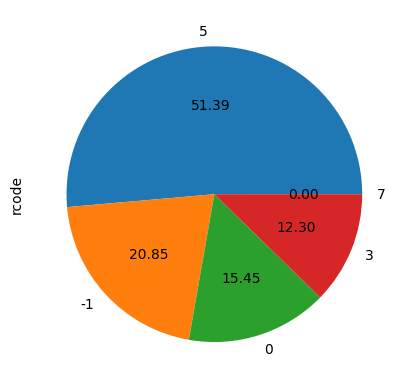

In [ ]:
dns_traffic.loc[(dns_traffic['domainname'] == '203.in-addr.arpa') | (dns_traffic['domainname'] == '42.in-addr.arpa' ), 'rcode'].value_counts().plot(kind = 'pie', autopct = '%.2f')

In [ ]:
#query with rcode = 0 for these domain: query to cache, ..
dns_traffic.loc[((dns_traffic['domainname'] == '203.in-addr.arpa') | (dns_traffic['domainname'] == '42.in-addr.arpa' ))
 & (dns_traffic['rcode'] == 0 ) , 'dst'].value_counts(dropna = False)

203.119.73.80               36087
117.122.125.80              24882
203.119.64.80               24225
2001:dc8:1:2:0:0:0:80        5358
203.119.8.106                4198
2001:dc8:9000:2:0:0:0:80     4180
2001:dc8:c001:2:0:0:0:80     3731
203.119.36.106               2569
203.119.74.83                1186
117.122.126.83                462
Name: dst, dtype: int64

<Axes: ylabel='rcode'>

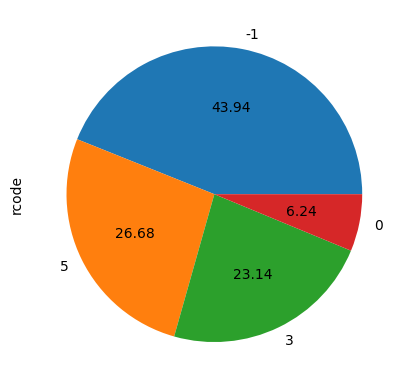

In [ ]:
df_tmp.loc[(df_tmp['domainname'] == '203.in-addr.arpa') | (df_tmp['domainname'] == '42.in-addr.arpa' ), 'rcode'].value_counts().plot(kind = 'pie', autopct = '%.2f')

In [ ]:
#source of this domain
#df_tmp.loc[(df_tmp['domainname'] == '203.in-addr.arpa') | (df_tmp['domainname'] == '42.in-addr.arpa' ), 'src'].value_counts().head(50)

dns_traffic.loc[((dns_traffic['domainname'] == '203.in-addr.arpa') | (dns_traffic['domainname'] == '42.in-addr.arpa' ))
 & (dns_traffic['rcode'] == 0 ), 'country'].value_counts(dropna = False).head()#plot(kind = 'pie', autopct = '%.2f')

US    27969
VN     9607
DE     7245
BR     7177
AR     5096
Name: country, dtype: int64

In [ ]:
dns_traffic.loc[((dns_traffic['domainname'] == '203.in-addr.arpa') | (dns_traffic['domainname'] == '42.in-addr.arpa' ))
 & (dns_traffic['rcode'] == 0 )  & (~(dns_traffic['country'].str.match('VN')).astype(bool) ) , 'z'].value_counts(dropna = False)#.head()

false    87436
NaN       9650
Name: z, dtype: int64

In [ ]:
#source of this domain
len(df_tmp.loc[(df_tmp['domainname'] == '42.in-addr.arpa' ), 'src'])


0    True
1    True
2    True
3    True
4    True
Name: country, dtype: bool

## Number of query the same record

## IP, Domain, Source port Entropy

## Rcode entropy